In [88]:
import pandas as pd
import numpy as np

In [89]:
train = pd.read_csv(r"C:\Users\rhdwo\OneDrive\바탕 화면\1차프로젝트 데이터\train.csv")
train.head(5)
train.info()
train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2452 non-null   object 
 1   매물확인방식  2452 non-null   object 
 2   보증금     2452 non-null   float64
 3   월세      2452 non-null   int64  
 4   전용면적    1665 non-null   float64
 5   해당층     2223 non-null   float64
 6   총층      2436 non-null   float64
 7   방향      2452 non-null   object 
 8   방수      2436 non-null   float64
 9   욕실수     2434 non-null   float64
 10  주차가능여부  2452 non-null   object 
 11  총주차대수   1756 non-null   float64
 12  관리비     2452 non-null   int64  
 13  중개사무소   2452 non-null   object 
 14  제공플랫폼   2452 non-null   object 
 15  게재일     2452 non-null   object 
 16  허위매물여부  2452 non-null   int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 325.8+ KB


ID          0
매물확인방식      0
보증금         0
월세          0
전용면적      787
해당층       229
총층         16
방향          0
방수         16
욕실수        18
주차가능여부      0
총주차대수     696
관리비         0
중개사무소       0
제공플랫폼       0
게재일         0
허위매물여부      0
dtype: int64

In [90]:
test = pd.read_csv(r"C:\Users\rhdwo\OneDrive\바탕 화면\1차프로젝트 데이터\test.csv")
test.head(5)
test.info()
test.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      613 non-null    object 
 1   매물확인방식  613 non-null    object 
 2   보증금     613 non-null    float64
 3   월세      613 non-null    int64  
 4   전용면적    429 non-null    float64
 5   해당층     563 non-null    float64
 6   총층      611 non-null    float64
 7   방향      613 non-null    object 
 8   방수      611 non-null    float64
 9   욕실수     611 non-null    float64
 10  주차가능여부  613 non-null    object 
 11  총주차대수   438 non-null    float64
 12  관리비     613 non-null    int64  
 13  중개사무소   613 non-null    object 
 14  제공플랫폼   613 non-null    object 
 15  게재일     613 non-null    object 
dtypes: float64(7), int64(2), object(7)
memory usage: 76.8+ KB


ID          0
매물확인방식      0
보증금         0
월세          0
전용면적      184
해당층        50
총층          2
방향          0
방수          2
욕실수         2
주차가능여부      0
총주차대수     175
관리비         0
중개사무소       0
제공플랫폼       0
게재일         0
dtype: int64

In [95]:
#!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder


# 1️⃣ 불필요한 ID 컬럼 제거
train = train.drop(columns=['ID'])

# 2️⃣ 결측치 임시 처리 (수치형은 평균값으로 채움)
for col in train.select_dtypes(include=['float64']).columns:
    train[col].fillna(train[col].mean(), inplace=True)

# 3️⃣ 범주형 데이터 Label Encoding 적용
label_cols = train.select_dtypes(include=['object']).columns.tolist()
encoder = LabelEncoder()
for col in label_cols:
    train[col] = encoder.fit_transform(train[col])

# 4️⃣ '허위매물여부'를 타겟으로 설정
X_train = train.drop(columns=['허위매물여부'])
y_train = train['허위매물여부']

# 5️⃣ SMOTE 적용
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)


print("SMOTE 적용 전:", y_train.value_counts())
print("SMOTE 적용 후:", y_train_over.value_counts())
print("새로운 X_train 크기:", X_train_over.shape)
print("새로운 y_train 크기:", y_train_over.shape)


SMOTE 적용 전: 허위매물여부
0    2154
1     298
Name: count, dtype: int64
SMOTE 적용 후: 허위매물여부
0    2154
1    2154
Name: count, dtype: int64
새로운 X_train 크기: (4308, 15)
새로운 y_train 크기: (4308,)


C:\Users\rhdwo\AppData\Local\Temp\ipykernel_27672\3167890213.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mean(), inplace=True)


In [103]:
train_smote = pd.concat([X_train_over, y_train_over])

train_smote.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8616 entries, 0 to 4307
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   매물확인방식  4308 non-null   float64
 1   보증금     4308 non-null   float64
 2   월세      4308 non-null   float64
 3   전용면적    4308 non-null   float64
 4   해당층     4308 non-null   float64
 5   총층      4308 non-null   float64
 6   방향      4308 non-null   float64
 7   방수      4308 non-null   float64
 8   욕실수     4308 non-null   float64
 9   주차가능여부  4308 non-null   float64
 10  총주차대수   4308 non-null   float64
 11  관리비     4308 non-null   float64
 12  중개사무소   4308 non-null   float64
 13  제공플랫폼   4308 non-null   float64
 14  게재일     4308 non-null   float64
 15  데이터타입   4308 non-null   object 
 16  허위매물여부  4308 non-null   float64
dtypes: float64(16), object(1)
memory usage: 1.2+ MB


In [111]:
train_smote['데이터타입'] = 'train'
test['데이터타입'] = 'test'

total_data = pd.concat([train_smote.drop(columns='허위매물여부'), test.drop(columns='ID')])

total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9229 entries, 0 to 612
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   매물확인방식  4921 non-null   object 
 1   보증금     4921 non-null   float64
 2   월세      4921 non-null   float64
 3   전용면적    4737 non-null   float64
 4   해당층     4871 non-null   float64
 5   총층      4919 non-null   float64
 6   방향      4921 non-null   object 
 7   방수      4919 non-null   float64
 8   욕실수     4919 non-null   float64
 9   주차가능여부  4921 non-null   object 
 10  총주차대수   4746 non-null   float64
 11  관리비     4921 non-null   float64
 12  중개사무소   4921 non-null   object 
 13  제공플랫폼   4921 non-null   object 
 14  게재일     4921 non-null   object 
 15  데이터타입   9229 non-null   object 
dtypes: float64(9), object(7)
memory usage: 1.2+ MB


In [112]:
total_data['관리비'] = total_data['관리비'] * 10000
total_data.head()

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,데이터타입
0,2.0,402500000.0,470000.0,27.009628,4.848403,15.0,7.0,1.0,1.0,0.0,40.000000,960000.0,240.0,1.0,394.0,train
1,2.0,170500000.0,200000.0,27.009628,3.000000,4.0,0.0,2.0,1.0,1.0,20.332574,0.0,228.0,3.0,472.0,train
2,1.0,114000000.0,380000.0,27.009628,2.000000,3.0,3.0,1.0,1.0,1.0,20.332574,0.0,150.0,0.0,444.0,train
3,2.0,163500000.0,30000.0,36.300000,3.000000,9.0,0.0,2.0,1.0,0.0,13.000000,100000.0,31.0,0.0,442.0,train
4,2.0,346000000.0,530000.0,27.009628,3.000000,3.0,3.0,2.0,1.0,1.0,20.332574,0.0,72.0,1.0,288.0,train


In [106]:
import datetime

#집세
total_data['집세'] = total_data['관리비'] + total_data['월세']

#방치일수
last_day = datetime.datetime.strptime(total_data['게재일'].max(), "%Y-%m-%d").date()
today = last_day + datetime.timedelta(days=1)

def get_delta_day(date):
    delta = today - datetime.datetime.strptime(date, "%Y-%m-%d").date()
    return delta.days
total_data['방치일수'] = total_data['게재일'].apply(lambda x : get_delta_day(x))

#미기재 항목
total_data['미기재'] = total_data.isna().sum(axis=1)



total_data.head()

TypeError: '>=' not supported between instances of 'float' and 'str'

In [71]:
total_data.drop(columns = ['게재일'], inplace = True, errors='ignore')

total_data.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,데이터타입,집세,방치일수,미기재
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,960000,t93Nt6I2I0,B플랫폼,train,1430000,146,2
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,train,200000,68,2
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,train,380000,96,2
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,100000,G52Iz8V2B9,A플랫폼,train,130000,98,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,train,530000,252,2


In [72]:
from sklearn.impute import KNNImputer


impute_cols = ['방수', '욕실수', '전용면적', '해당층', '총층', '총주차대수']

imputer = KNNImputer(n_neighbors=3)
total_data[impute_cols] = imputer.fit_transform(total_data[impute_cols])

total_data[impute_cols].isna().sum()

방수       0
욕실수      0
전용면적     0
해당층      0
총층       0
총주차대수    0
dtype: int64

In [73]:
from sklearn.preprocessing import LabelEncoder

Label_cols = total_data.select_dtypes(include=['object']).columns.tolist()


encoder = LabelEncoder()

for col in Label_cols:
    total_data[col] = encoder.fit_transform(total_data[col])

total_data.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,데이터타입,집세,방치일수,미기재
0,613,2,402500000.0,470000,17.500000,12.333333,15.0,7,1.0,1.0,0,40.000000,960000,256,1,1,1430000,146,2
1,614,2,170500000.0,200000,37.970000,3.000000,4.0,0,2.0,1.0,1,1.666667,0,240,3,1,200000,68,2
2,615,1,114000000.0,380000,26.410000,2.000000,3.0,3,1.0,1.0,1,6.000000,0,157,0,1,380000,96,2
3,616,2,163500000.0,30000,36.300000,3.000000,9.0,0,2.0,1.0,0,13.000000,100000,32,0,1,130000,98,0
4,617,2,346000000.0,530000,36.343333,3.000000,3.0,3,2.0,1.0,1,1.000000,0,76,1,1,530000,252,2


In [74]:
from sklearn.model_selection import train_test_split

# train_test_split을 사용해 데이터 분리 (test 데이터 20%)
train_processed, test_processed = train_test_split(total_data, test_size=0.2, random_state=42)

# 원래 train 데이터에 있던 '허위매물여부' 컬럼 다시 추가
train_processed['허위매물여부'] = train.loc[train_processed.index, '허위매물여부'].values

print("train_processed 크기:", train_processed.shape)
print("test_processed 크기:", test_processed.shape)


print(train_processed.head())
print('-' * 20)
print(test_processed.head())

train_processed 크기: (2452, 20)
test_processed 크기: (613, 19)
        ID  매물확인방식          보증금      월세       전용면적  해당층    총층  방향   방수  욕실수  \
2033  2646       1   31000000.0  570000  24.870000  2.0  12.0   7  1.0  1.0   
1374  1987       0  175500000.0  620000  25.996667  3.0   7.0   6  1.0  1.0   
351    964       0  187500000.0  280000  25.790000  7.0   8.0   2  2.0  1.0   
470    470       2  446500000.0  100000  31.680000  3.0   8.0   4  1.0  1.0   
1195  1808       2   69000000.0  560000  19.070000  3.0   4.0   3  1.0  1.0   

      주차가능여부      총주차대수    관리비  중개사무소  제공플랫폼  데이터타입      집세  방치일수  미기재  허위매물여부  
2033       1  47.000000      0     32      1      1  570000   363    0       0  
1374       1   3.333333  70000    229      0      1  690000   447    2       0  
351        0   1.000000  30000      6      1      1  310000    99    0       0  
470        1  36.000000  80000     32      8      0  180000   299    0       0  
1195       1   2.666667  90000    206      2      1  650000 

In [ ]:
# Logistic + Grid

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. 데이터 준비
X = train_processed.drop(columns=['허위매물여부'])  # 입력 변수
y = train_processed['허위매물여부']  # 타겟 변수

# 2. 학습/검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. 테스트 데이터 컬럼 맞추기
missing_cols = set(X_train.columns) - set(test_processed.columns)
for col in missing_cols:
    test_processed[col] = np.nan

# NaN 값이 있으면 0으로 대체체
test_processed = test_processed.fillna(0)

# 테스트 데이터 컬럼 순서도 동일하게 맞춤
test_processed = test_processed[X_train.columns]


lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_val)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_val, lr_pred)))

LogisticRegression 정확도: 0.8737


In [80]:
# grid searchCV

from sklearn.model_selection import GridSearchCV

parameters = {'C': [0.1, 1, 10],  # 정규화 강도
    'penalty': ['l2'],  # L2 정규화
    'solver': ['liblinear'],  # solver로 'liblinear' 사용
    'max_iter': [100, 200]  # 최대 반복 횟수}
}

grid_lclf = GridSearchCV(lr_clf, param_grid=parameters, scoring='accuracy',cv=5)
grid_lclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_lclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_lclf.best_score_))
best_lclf = grid_lclf.best_estimator_

dpredictions = best_lclf.predict(X_val)
accuracy = accuracy_score(y_val, dpredictions)

pred_proba = best_lclf.predict_proba(X_val)[:, 1]

print('테스트 세트에서의 LogisticResfression 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
GridSearchCV 최고 정확도: 0.8725
테스트 세트에서의 LogisticResfression 정확도 : 0.8737


In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# 정밀도, 재현율, F1-score 확인
print("\n📌 검증 데이터 상세 평가")

def get_clf_eval(y_test,dpredictions, pred_proba):
    confusion = confusion_matrix(y_test, dpredictions)
    accuracy = accuracy_score(y_test , dpredictions)
    precision = precision_score(y_test , dpredictions)
    recall = recall_score(y_test , dpredictions)
    f1 = f1_score(y_test,dpredictions)
    auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, auc))

get_clf_eval(y_val, dpredictions, pred_proba)


print(classification_report(y_val, dpredictions))


📌 검증 데이터 상세 평가
오차 행렬
[[429   0]
 [ 62   0]]
정확도: 0.8737, 정밀도: 0.0000, 재현율: 0.0000,    F1: 0.0000, AUC:0.4535
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       429
           1       0.00      0.00      0.00        62

    accuracy                           0.87       491
   macro avg       0.44      0.50      0.47       491
weighted avg       0.76      0.87      0.81       491



c:\Users\rhdwo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rhdwo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rhdwo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rhdwo\anaconda3\Lib\site-packages\sklea

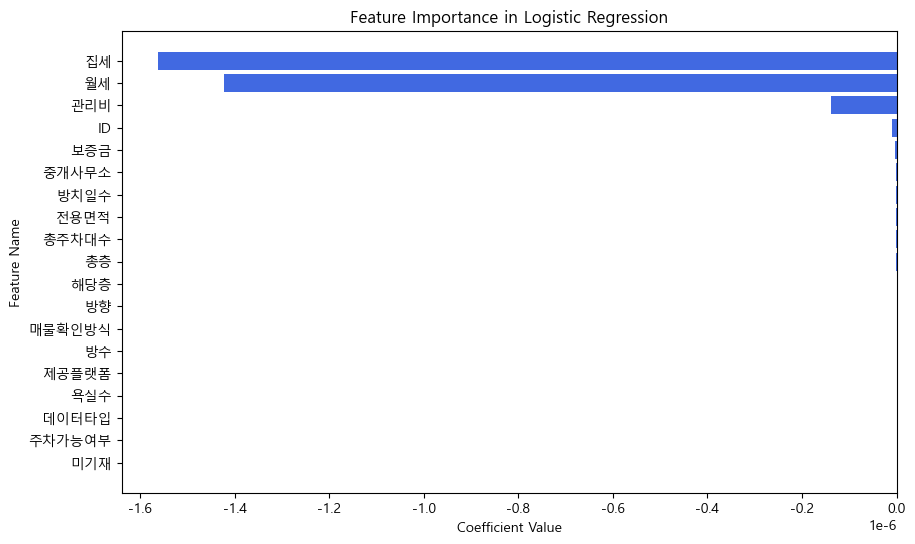

In [86]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())
plt.rcParams['axes.unicode_minus'] = False

feature_importance = best_lclf.coef_[0]
feature_names = X_train.columns

feat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feat_importance_df = feat_importance_df.sort_values(by='Importance', key=abs, ascending=False)

# 시각화 (bar chart)
plt.figure(figsize=(10, 6))
plt.barh(feat_importance_df['Feature'], feat_importance_df['Importance'], color='royalblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()  # 중요도가 높은 순으로 정렬
plt.show()